In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns
import shap

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_16/'
training_data_df = pd.read_csv(basedir + 'top22_ohe.csv')
print(training_data_df.shape)
training_data_df.head()

(3658226, 64)
Wall time: 10.2 s


,토지면적over총연면적times공시지가,year_linear,건축년도,전용면적,ynorm,xy,x_2nd,층mean,주건축물수,총건축면적,호수대비연면적,xnorm,옥내자주식대수,호수대비부속건축물면적,총호수,층,y_2nd,호수대비주차수,가격면적,trade_type_아파트_매매,trade_type_아파트_전세,trade_type_오피스텔_매매,trade_type_오피스텔_전세,trade_type_다세대연립_매매,trade_type_다세대연립_전세,용도지역명1_제3종일반주거지역,용도지역명1_제2종일반주거지역,용도지역명1_준주거지역,용도지역명1_일반상업지역,용도지역명1_제1종일반주거지역,용도지역명1_근린상업지역,용도지역명1_준공업지역,용도지역명1_제1종전용주거지역,용도지역명1_유통상업지역,용도지역명1_제2종전용주거지역,용도지역명1_자연녹지지역,용도지역명1_개발제한구역,용도지역명1_중심상업지역,토지이동상황_아파트,토지이동상황_상업기타,토지이동상황_주거기타,토지이동상황_주상용,토지이동상황_주상기타,토지이동상황_업무용,토지이동상황_상업용,토지이동상황_상업나지,토지이동상황_연립,토지이동상황_단독,토지이동상황_다세대,토지이동상황_주거나지,토지이동상황_주상나지,토지이동상황_공업기타,토지이동상황_도로등,토지이동상황_공원등,토지이동상황_전,토지이동상황_주차장등,토지이동상황_공업용,토지이동상황_공업나지,토지이동상황_토지임야,토지이동상황_위험시설,아파트지구_해당사항없음,아파트지구_포함,아파트지구_접함,아파트지구_저촉
0,202.216536,7.666667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,5579.095707,0.0,0.0,54.0,2,4.094180e+07,0.0,733.118971,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,202.216536,7.916667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,5579.095707,0.0,0.0,54.0,2,4.094180e+07,0.0,733.118971,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,202.216536,7.000000,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,5579.095707,0.0,0.0,54.0,4,4.094180e+07,0.0,450.160772,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,202.216536,7.166667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,5579.095707,0.0,0.0,54.0,9,4.094180e+07,0.0,411.575563,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,202.216536,7.666667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,5579.095707,0.0,0.0,54.0,1,4.094180e+07,0.0,475.884244,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# CV

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.linear_model import HuberRegressor, LinearRegression, GammaRegressor

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
huber_model = HuberRegressor(alpha=0)

In [ ]:
params = {'max_iter':[10,20,30,40,50]}

In [ ]:
cv_model = GridSearchCV(huber_model, params, n_jobs=6, verbose=3, scoring='neg_root_mean_squared_error')

In [ ]:
%%time
cv_model.fit(training_data_df.drop(columns=['가격면적']), training_data_df['가격면적'])

In [ ]:
cv_results_df = pd.DataFrame(cv_model.cv_results_)

In [ ]:
cv_results_df

In [ ]:
lr_model = LinearRegression()

In [ ]:
params = {'normalize':[True, False]}

In [ ]:
cv_model = GridSearchCV(lr_model, params, n_jobs=6, verbose=3, scoring='neg_root_mean_squared_error')

In [ ]:
%%time
cv_model.fit(training_data_df.drop(columns=['가격면적']), training_data_df['가격면적'])

In [ ]:
cv_results_df = pd.DataFrame(cv_model.cv_results_)

In [ ]:
cv_results_df

In [ ]:
knn_model = KNeighborsRegressor()

In [ ]:
params = {'n_neighbors':[5,6,7,8,9,10]}

In [ ]:
cv_model = GridSearchCV(knn_model, params, n_jobs=6, verbose=3, scoring='neg_root_mean_squared_error')

In [ ]:
%%time
cv_model.fit(training_data_df.drop(columns=['가격면적']), training_data_df['가격면적'])

In [ ]:
cv_results_df = pd.DataFrame(cv_model.cv_results_)

In [ ]:
cv_results_df

# Training

In [6]:
from sklearn.model_selection import KFold, GroupKFold

In [7]:
import lightgbm as lgb

In [8]:
from sklearn.metrics import r2_score

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
# Next things to do:
# 1. Do Variance Inflation Factor (VIF) analysis.
# 2. keep the feature with the highest shap value
# 3. Retrain
# 4. Remove 1 feature at a time and find out the set of feature with the lowest loss.
# 5. Retrain
# 6. Continue production prep

In [12]:
target_cols = ['가격면적']

Fold 0 start
(2926580, 63)
y dist plot


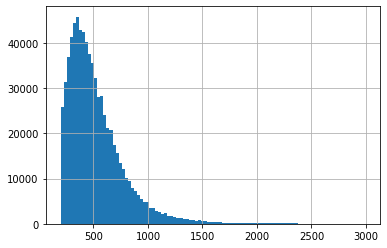

preds dist plot


<Figure size 432x288 with 0 Axes>

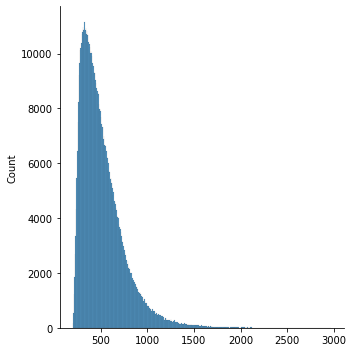

122.49571502422909
Fold 0 end


<Figure size 432x288 with 0 Axes>

In [16]:
count = 0
oof = np.zeros(training_data_df.shape[0])

shap_summary_df = pd.DataFrame()

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    ml_model = KNeighborsRegressor(algorithm='ball_tree')
    
    ml_model.fit(x_train, y_train)
    
    preds = ml_model.predict(x_val)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    
    break

Fold 0 start
(2926580, 63)
y dist plot


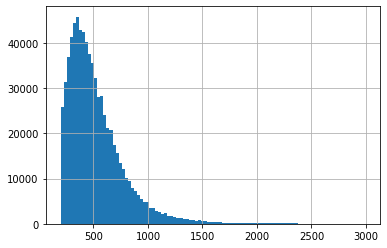

preds dist plot


<Figure size 432x288 with 0 Axes>

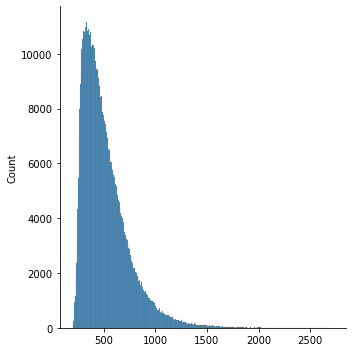

133.29685892833353
Fold 0 end


<Figure size 432x288 with 0 Axes>

In [20]:
count = 0
oof = np.zeros(training_data_df.shape[0])

shap_summary_df = pd.DataFrame()

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    ml_model = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10)
    
    ml_model.fit(x_train, y_train)
    
    preds = ml_model.predict(x_val)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    
    break

In [13]:
from sklearn.ensemble import AdaBoostRegressor

Fold 0 start
(2926580, 63)
y dist plot


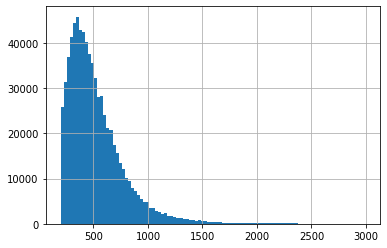

preds dist plot


<Figure size 432x288 with 0 Axes>

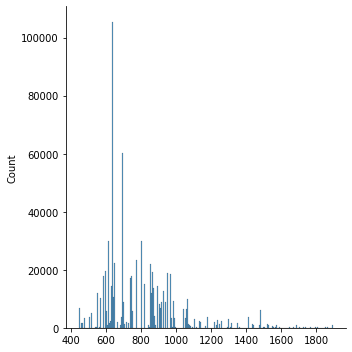

321.41120202561075
Fold 0 end


<Figure size 432x288 with 0 Axes>

In [14]:
count = 0
oof = np.zeros(training_data_df.shape[0])

shap_summary_df = pd.DataFrame()

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    ml_model = AdaBoostRegressor()
    
    ml_model.fit(x_train, y_train)
    
    preds = ml_model.predict(x_val)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    
    break

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Fold 0 start
(2926580, 63)
y dist plot


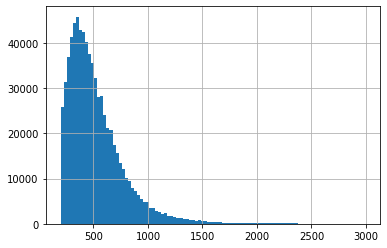

preds dist plot


<Figure size 432x288 with 0 Axes>

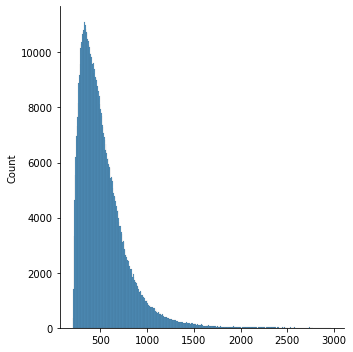

60.19760591393465
Fold 0 end


<Figure size 432x288 with 0 Axes>

In [16]:
count = 0
oof = np.zeros(training_data_df.shape[0])

shap_summary_df = pd.DataFrame()

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    ml_model = RandomForestRegressor()
    
    ml_model.fit(x_train, y_train)
    
    preds = ml_model.predict(x_val)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    
    break

Fold 0 start
(2926580, 63)
y dist plot


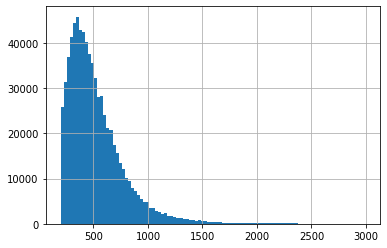

preds dist plot


<Figure size 432x288 with 0 Axes>

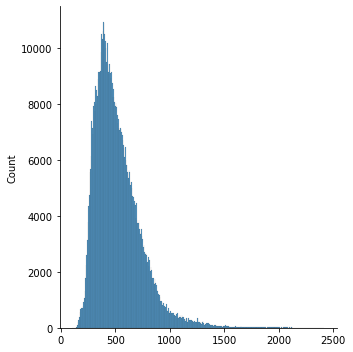

121.99152880589614
Fold 0 end


<Figure size 432x288 with 0 Axes>

In [18]:
count = 0
oof = np.zeros(training_data_df.shape[0])

shap_summary_df = pd.DataFrame()

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    ml_model = GradientBoostingRegressor()
    
    ml_model.fit(x_train, y_train)
    
    preds = ml_model.predict(x_val)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    
    break